In [1]:
import os
import warnings
# warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Carlo\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


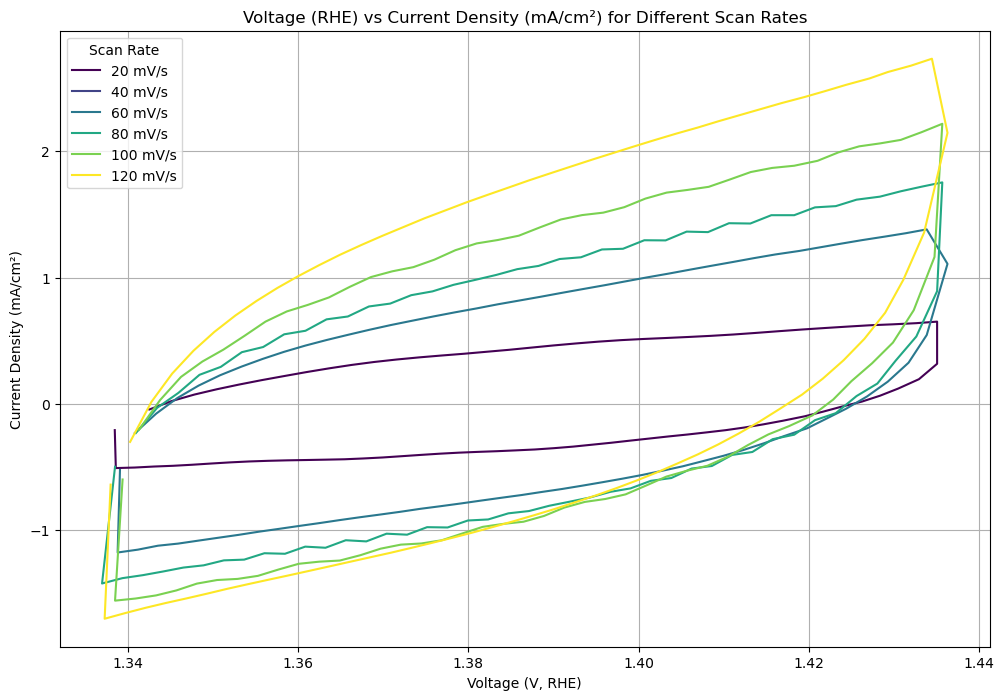

In [41]:

# 定义文件路径
file_paths = [
    "./Cdl-20.xlsx",
    "./Cdl-40.xlsx",
    "./Cdl-60.xlsx",
    "./Cdl-80.xlsx",
    "./Cdl-100.xlsx",
    "./Cdl-120.xlsx"
]

# 定义常量
electrode_area_cm2 = 1  # 电极面积，单位为cm²
voltage_shift = 0.9181  # 电压转换到RHE的偏移值

# 初始化DataFrame，用于存储每个扫描速率的概要信息
summary_df = pd.DataFrame(columns=['Scan Rate (mV/s)', 'Anodic Current Density (mA/cm²)', 'Cathodic Current Density (mA/cm²)', 'Current Density Difference (mA/cm²)'])

# 准备绘图
plt.figure(figsize=(12, 8))

# 定义渐变色数组
colors = plt.cm.viridis(np.linspace(0, 1, len(file_paths)))

# 添加用于保存每个扫描速率转换后的电压和电流数据的字典
converted_data = pd.DataFrame()

# 处理每一个文件
for idx, file_path in enumerate(file_paths):
    # 加载数据
    data = pd.read_excel(file_path)
    
    # 筛选出最后一次扫描的数据
    last_scan_number = data['Scan'].max()
    last_scan_data = data[data['Scan'] == last_scan_number].copy()
    
    # 转换电压到RHE和电流到电流密度
    last_scan_data['Voltage_RHE'] = last_scan_data['WE(1).Potential (V)'] + voltage_shift
    last_scan_data['Current_Density_mA/cm2'] = (last_scan_data['WE(1).Current (A)'] / electrode_area_cm2) * 1000
    
    # 计算电势窗口中间位置的电压
    voltage_midpoint = last_scan_data['Voltage_RHE'].mean()

    # 找出中间电压对应的两个电流密度值
    midpoint_currents = last_scan_data.iloc[(last_scan_data['Voltage_RHE']-voltage_midpoint).abs().argsort()[:2]]

    # 识别阳极和阴极电流密度
    anodic_current_density = midpoint_currents['Current_Density_mA/cm2'].max()
    cathodic_current_density = midpoint_currents['Current_Density_mA/cm2'].min()

    # 计算电流密度差
    current_density_difference = (anodic_current_density - cathodic_current_density) / 2

    # 将概要信息添加到DataFrame
    scan_rate = int(file_path.split('-')[-1].split('.')[0])  # 从文件名中提取扫描速率
    # 构造一个新的DataFrame来保存当前的扫描速率和电流密度信息
    new_row = pd.DataFrame({
        'Scan Rate (mV/s)': [scan_rate],
        'Anodic Current Density (mA/cm²)': [anodic_current_density],
        'Cathodic Current Density (mA/cm²)': [cathodic_current_density],
        'Current Density Difference (mA/cm²)': [current_density_difference]
    })

    # 使用 pandas.concat 方法将新行添加到 summary_df
    summary_df = pd.concat([summary_df, new_row], ignore_index=True)

    # 保存转换后的电压和电流数据
    # converted_data[scan_rate] = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']]

    # 保存转换后的电压和电流数据
    new_data = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']].copy()
    new_data['Scan Rate (mV/s)'] = scan_rate  # 可选：添加一个列来标记这些数据对应的扫描速率
    
    # 使用 pandas.concat 方法将新数据添加到 converted_data
    converted_data = pd.concat([converted_data, new_data], axis=1, ignore_index=False)

    # 绘制电流密度与电压的关系图
    plt.plot(last_scan_data['Voltage_RHE'], last_scan_data['Current_Density_mA/cm2'], color=colors[idx], label=f'{scan_rate} mV/s')

# 完成绘图设置
plt.title('Voltage (RHE) vs Current Density (mA/cm²) for Different Scan Rates')
plt.xlabel('Voltage (V, RHE)')
plt.ylabel('Current Density (mA/cm²)')
plt.legend(title='Scan Rate')
plt.grid(True)

# 显示图表
plt.show()

In [42]:
converted_data

,Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s)
2446,1.342538,-0.043884,20.0,NaN,NaN,NaN,1.348337,0.145538,60.0,1.343454,-0.030951,80.0,NaN,NaN,NaN,NaN,NaN,NaN
2447,1.345163,0.022772,20.0,NaN,NaN,NaN,1.350839,0.226746,60.0,1.345956,0.087555,80.0,1.341318,-0.204834,100.0,NaN,NaN,NaN
2448,1.347818,0.073975,20.0,NaN,NaN,NaN,1.353372,0.295624,60.0,1.348428,0.230469,80.0,1.343790,0.029703,100.0,NaN,NaN,NaN
2449,1.350443,0.115784,20.0,NaN,NaN,NaN,1.355875,0.356903,60.0,1.350931,0.293396,80.0,1.346262,0.214111,100.0,NaN,NaN,NaN
2450,1.353098,0.153625,20.0,NaN,NaN,NaN,1.358377,0.412781,60.0,1.353403,0.409668,80.0,1.348764,0.335449,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.344492,-1.575623,120.0
2531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.342111,-1.613770,120.0
2532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.339700,-1.655884,120.0
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337289,-1.700439,120.0


In [45]:
summary_df

,Scan Rate (mV/s),Anodic Current Density (mA/cm²),Cathodic Current Density (mA/cm²),Current Density Difference (mA/cm²)
0,20,0.445831,-0.360626,0.403229
1,40,-0.513000,-0.513000,0.000000
2,60,0.818176,-0.721436,0.769806
3,80,1.066895,-0.848083,0.957489
4,100,1.331787,-0.932617,1.132202
5,120,1.770935,-0.928650,1.349792


In [46]:
summary_df['Scan Rate (mV/s)']

0     20
1     40
2     60
3     80
4    100
5    120
Name: Scan Rate (mV/s), dtype: object

In [49]:
type(summary_df['Scan Rate (mV/s)'][0])

int

In [47]:
summary_df['Current Density Difference (mA/cm²)']

0    0.403229
1    0.000000
2    0.769806
3    0.957489
4    1.132202
5    1.349792
Name: Current Density Difference (mA/cm²), dtype: float64

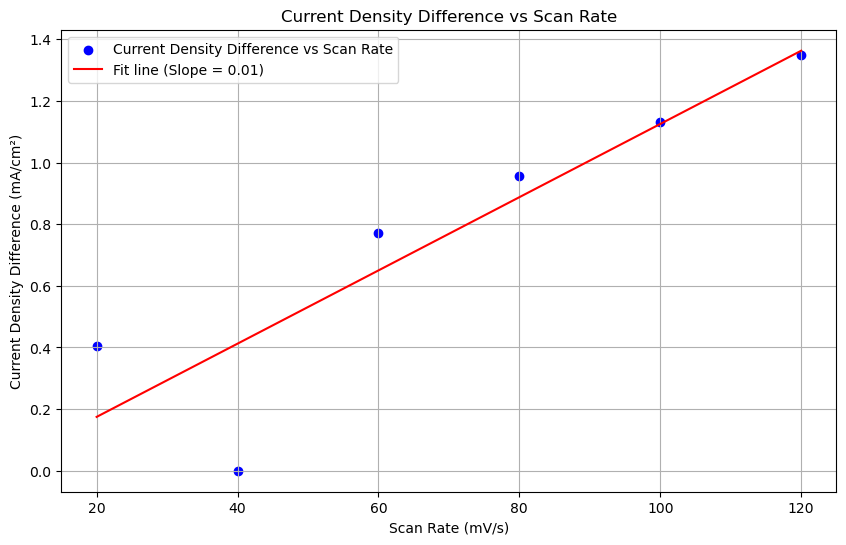

In [51]:
# 绘制电流密度差相对于扫描速率的散点图
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], color='blue', label='Current Density Difference vs Scan Rate')

# 确保'Scan Rate (mV/s)'和'Current Density Difference (mA/cm²)'列是数值类型
summary_df['Scan Rate (mV/s)'] = pd.to_numeric(summary_df['Scan Rate (mV/s)'], errors='coerce')
summary_df['Current Density Difference (mA/cm²)'] = pd.to_numeric(summary_df['Current Density Difference (mA/cm²)'], errors='coerce')

# 删除包含NaN值的行
summary_df = summary_df.dropna()

# 进行线性拟合以求双电层电容
slope, intercept = np.polyfit(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], 1)
plt.plot(summary_df['Scan Rate (mV/s)'], slope*summary_df['Scan Rate (mV/s)'] + intercept, color='red', label=f'Fit line (Slope = {slope:.2f})')

# 完成绘图设置
plt.title('Current Density Difference vs Scan Rate')
plt.xlabel('Scan Rate (mV/s)')
plt.ylabel('Current Density Difference (mA/cm²)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

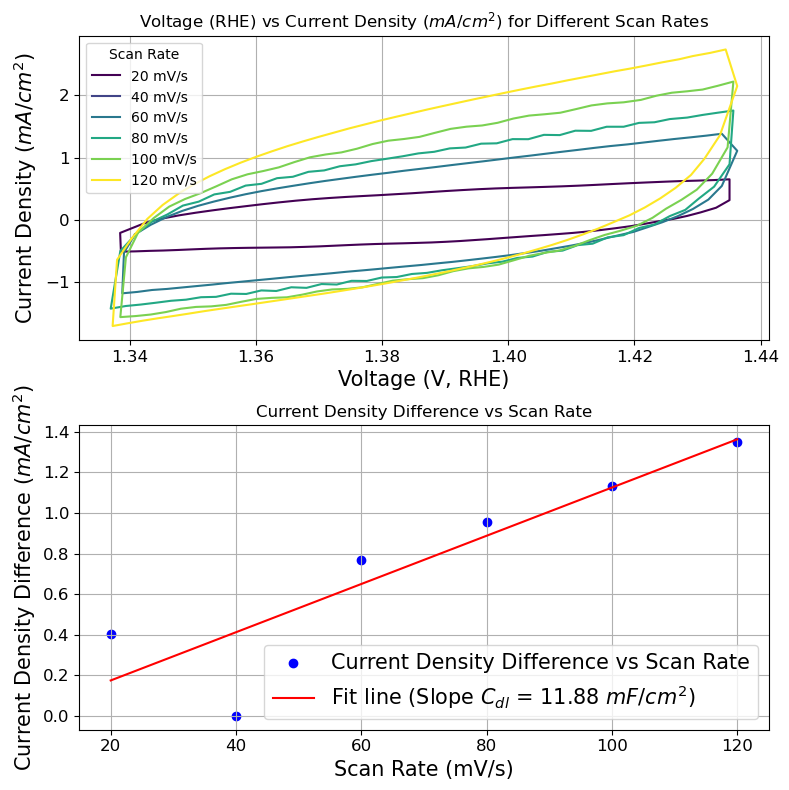

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件路径
file_paths = [
    "./Cdl-20.xlsx",
    "./Cdl-40.xlsx",
    "./Cdl-60.xlsx",
    "./Cdl-80.xlsx",
    "./Cdl-100.xlsx",
    "./Cdl-120.xlsx"
]

# 定义常量
electrode_area_cm2 = 1  # 电极面积，单位为cm²
voltage_shift = 0.9181  # 电压转换到RHE的偏移值

# 初始化DataFrame，用于存储每个扫描速率的概要信息
summary_df = pd.DataFrame(columns=['Scan Rate (mV/s)', 'Anodic Current Density (mA/cm²)', 'Cathodic Current Density (mA/cm²)', 'Current Density Difference (mA/cm²)'])

# 准备绘图，创建两行一列的子图布局
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 创建两行一列的子图，分配给axes

# 定义渐变色数组
colors = plt.cm.viridis(np.linspace(0, 1, len(file_paths)))

# 添加用于保存每个扫描速率转换后的电压和电流数据的字典
converted_data = pd.DataFrame()

# 处理每一个文件
for idx, file_path in enumerate(file_paths):
    # 加载数据
    data = pd.read_excel(file_path)
    
    # 筛选出最后一次扫描的数据
    last_scan_number = data['Scan'].max()
    last_scan_data = data[data['Scan'] == last_scan_number].copy()
    
    # 转换电压到RHE和电流到电流密度
    last_scan_data['Voltage_RHE'] = last_scan_data['WE(1).Potential (V)'] + voltage_shift
    last_scan_data['Current_Density_mA/cm2'] = (last_scan_data['WE(1).Current (A)'] / electrode_area_cm2) * 1000
    
    # 计算电势窗口中间位置的电压
    voltage_midpoint = last_scan_data['Voltage_RHE'].mean()

    # 找出中间电压对应的两个电流密度值
    midpoint_currents = last_scan_data.iloc[(last_scan_data['Voltage_RHE']-voltage_midpoint).abs().argsort()[:2]]

    # 识别阳极和阴极电流密度
    anodic_current_density = midpoint_currents['Current_Density_mA/cm2'].max()
    cathodic_current_density = midpoint_currents['Current_Density_mA/cm2'].min()

    # 计算电流密度差
    current_density_difference = (anodic_current_density - cathodic_current_density) / 2

    # 将概要信息添加到DataFrame
    scan_rate = int(file_path.split('-')[-1].split('.')[0])  # 从文件名中提取扫描速率
    # 构造一个新的DataFrame来保存当前的扫描速率和电流密度信息
    new_row = pd.DataFrame({
        'Scan Rate (mV/s)': [scan_rate],
        'Anodic Current Density (mA/cm²)': [anodic_current_density],
        'Cathodic Current Density (mA/cm²)': [cathodic_current_density],
        'Current Density Difference (mA/cm²)': [current_density_difference]
    })

    # 使用 pandas.concat 方法将新行添加到 summary_df
    summary_df = pd.concat([summary_df, new_row], ignore_index=True)

    # 保存转换后的电压和电流数据
    # converted_data[scan_rate] = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']]

    # 保存转换后的电压和电流数据
    new_data = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']].copy()
    new_data['Scan Rate (mV/s)'] = scan_rate  # 可选：添加一个列来标记这些数据对应的扫描速率
    
    # 使用 pandas.concat 方法将新数据添加到 converted_data
    converted_data = pd.concat([converted_data, new_data], axis=1, ignore_index=False)

    # 复制第一行并添加到DataFrame的末尾用于绘制闭合曲线
    last_scan_data = pd.concat([last_scan_data, last_scan_data.iloc[[0]]], ignore_index=True)

    # 绘制第一幅图：电流密度与电压的关系图
    axes[0].plot(last_scan_data['Voltage_RHE'], last_scan_data['Current_Density_mA/cm2'], color=colors[idx], label=f'{scan_rate} mV/s')

# 完成第一幅图的设置
axes[0].set_title('Voltage (RHE) vs Current Density ($mA/cm^2$) for Different Scan Rates')
axes[0].set_xlabel('Voltage (V, RHE)', fontsize=15)
axes[0].set_ylabel('Current Density ($mA/cm^2$)', fontsize=15)
axes[0].legend(title='Scan Rate')
axes[0].grid(True)
# 设置刻度标签字号
axes[0].tick_params(axis='both', which='major', labelsize=12)

# 确保'Scan Rate (mV/s)'和'Current Density Difference (mA/cm²)'列是数值类型
summary_df['Scan Rate (mV/s)'] = pd.to_numeric(summary_df['Scan Rate (mV/s)'], errors='coerce')
summary_df['Current Density Difference (mA/cm²)'] = pd.to_numeric(summary_df['Current Density Difference (mA/cm²)'], errors='coerce')

# 删除包含NaN值的行
summary_df = summary_df.dropna()

# 进行线性拟合以求双电层电容
slope, intercept = np.polyfit(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], 1)

# 绘制第二幅图：电流密度差相对于扫描速率的散点图和拟合直线
axes[1].scatter(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], color='blue', label='Current Density Difference vs Scan Rate')
axes[1].plot(summary_df['Scan Rate (mV/s)'], 
             slope*summary_df['Scan Rate (mV/s)'] + intercept, 
             color='red', 
             label=f'Fit line (Slope $C_{{dl}}$ = {slope*1000:.2f} $mF/cm^2$)')

# 完成第二幅图的设置
axes[1].set_title('Current Density Difference vs Scan Rate')
axes[1].set_xlabel('Scan Rate (mV/s)', fontsize=15)
axes[1].set_ylabel('Current Density Difference ($mA/cm^2$)', fontsize=15)
axes[1].legend(fontsize=15)
axes[1].grid(True)
# 设置刻度标签字号
axes[1].tick_params(axis='both', which='major', labelsize=12)

# 显示整个图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域。
plt.show()

In [4]:
# data = pd.read_excel('./CV Activation.xlsx', header=0, index_col='Scan') # 加载数据
data = pd.read_excel("G:/2-博士文件\9-实验数据/20230720-Autolab测试泡沫镍电极/MoAg2O4-1/CV Activation.xlsx", header=0, index_col=None) # 加载数据
data

,Potential applied (V),Time (s),WE(1).Current (A),WE(1).Potential (V),Scan,Index,Q+,Q-,Current range,Overload,User events
0,0.005035,3.876536,-0.005591,0.005203,1,1,0.028160,-0.035848,10 mA,NaN,NaN
1,0.010071,3.977244,-0.005276,0.010217,1,2,0.028160,-0.035848,10 mA,NaN,NaN
2,0.015106,4.077952,-0.004967,0.015344,1,3,0.028160,-0.035848,10 mA,NaN,NaN
3,0.020142,4.178660,-0.004677,0.020364,1,4,0.028160,-0.035848,10 mA,NaN,NaN
4,0.025177,4.279368,-0.004398,0.025320,1,5,0.028160,-0.035848,10 mA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4797,0.010071,486.972811,-0.010220,0.010315,20,4798,0.085524,-0.089121,100 mA,NaN,NaN
4798,0.005035,487.073519,-0.009476,0.005215,20,4799,0.085524,-0.089121,100 mA,NaN,NaN
4799,0.000000,487.174227,-0.009152,0.000180,20,4800,0.085524,-0.089121,100 mA,NaN,NaN
4800,0.005035,487.274935,-0.008084,0.005139,20,4801,0.085524,-0.089121,100 mA,NaN,NaN


In [5]:
data['Scan'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

C:\Users\Carlo\AppData\Local\Temp\ipykernel_22596\1964904803.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


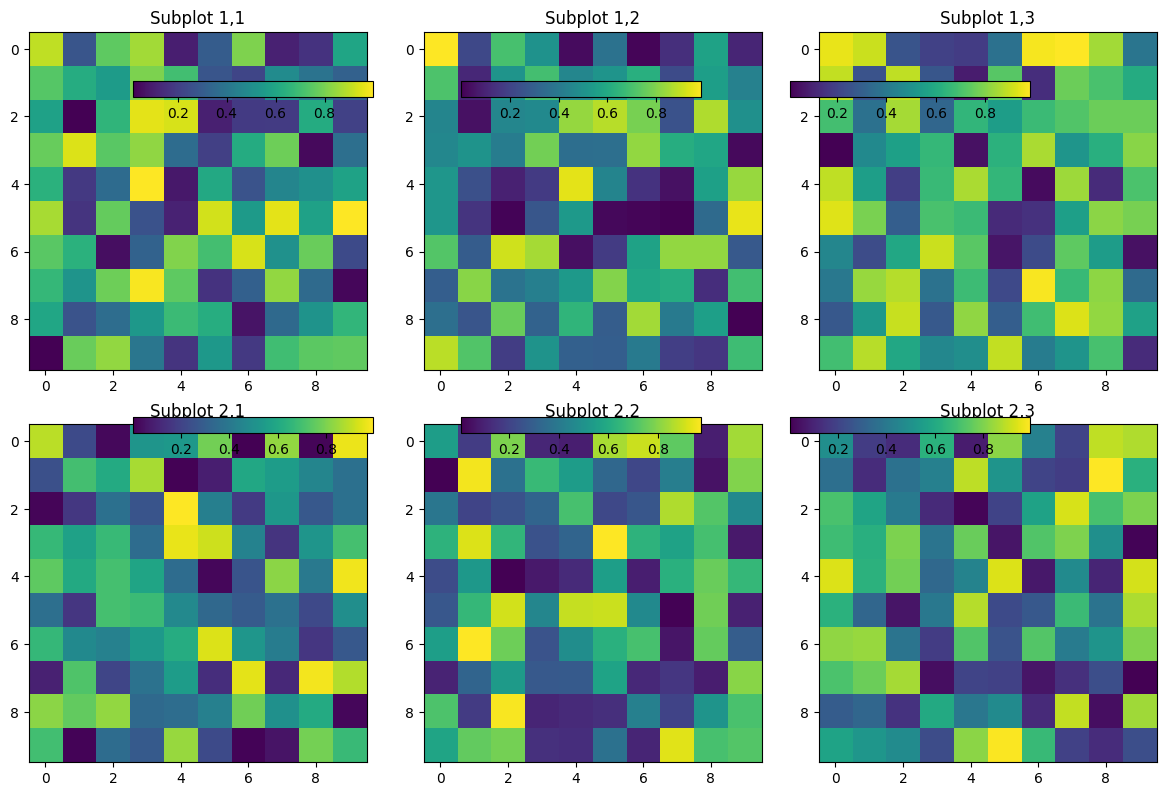

In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 假设的行数和列数
nrows, ncols = 2, 3

# 创建多行多列的子图
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))

# 遍历每个子图，并添加数据和颜色条
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]

        # 假设的数据
        data = np.random.rand(10, 10)
        im = ax.imshow(data, interpolation='nearest')

        # 为每个子图添加颜色条的位置和大小
        # [左, 下, 宽度, 高度] 相对于子图的位置
        cbar_ax = fig.add_axes([ax.get_position().x0, 
                                ax.get_position().y1 - 0.04, 
                                0.2, 0.02])

        # 在新创建的轴域中添加颜色条
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

        # 设置子图的标题
        ax.set_title(f'Subplot {i+1},{j+1}')

plt.tight_layout()
plt.show()


边界框位置和大小: Bbox(x0=0.6826822916666666, y0=0.6685416666666666, x1=0.8869791666666667, y1=0.8626388888888887)
[0.6826822916666666, 0.6685416666666666, 0.20429687500000004, 0.19409722222222214]


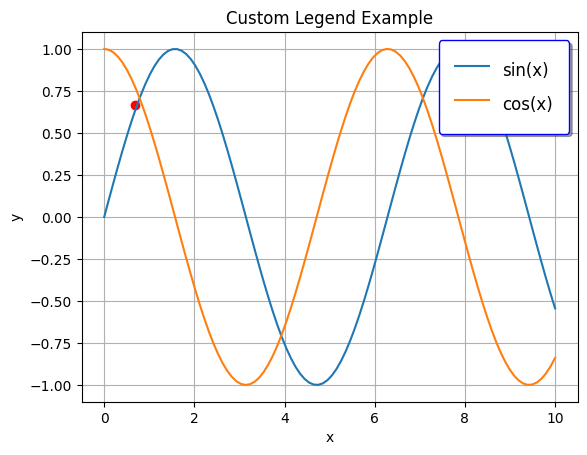

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 绘制图形
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')

# 自定义图例样式
legend = plt.legend(loc='upper right', 
           fontsize='large',         # 字体大小
           edgecolor='blue',         # 边框颜色
           framealpha=1,             # 边框透明度
           shadow=True,              # 阴影效果
           borderpad=1,              # 边框内边距
           handlelength=2,           # 图例标记的长度
           handleheight=2,           # 图例标记的高度
           labelspacing=0.5)         # 标签间距

plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Legend Example')
plt.grid(True)
bbox = legend.get_window_extent().transformed(plt.gcf().transFigure.inverted())
print("边界框位置和大小:", bbox)
print([bbox.x0, bbox.y0, bbox.width, bbox.height])
plt.scatter(bbox.x0, bbox.y0, color='red')
plt.show()


边界框位置和大小: Bbox(x0=4.369166666666667, y0=3.2089999999999996, x1=5.676666666666667, y1=4.140666666666666)
[4.369166666666667, 3.2089999999999996, 1.3075, 0.9316666666666666]


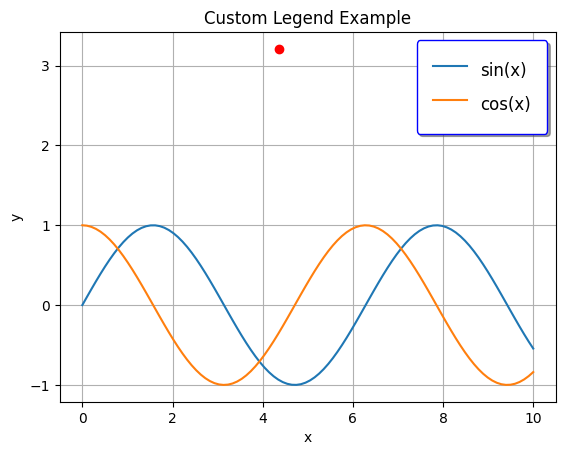

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 绘制图形
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')

# 自定义图例样式
legend = plt.legend(loc='upper right', 
           fontsize='large',         # 字体大小
           edgecolor='blue',         # 边框颜色
           framealpha=1,             # 边框透明度
           shadow=True,              # 阴影效果
           borderpad=1,              # 边框内边距
           handlelength=2,           # 图例标记的长度
           handleheight=2,           # 图例标记的高度
           labelspacing=0.5)         # 标签间距

plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Legend Example')
plt.grid(True)

# 强制渲染图表以更新图例位置
plt.gcf().canvas.draw()
bbox = legend.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())
print("边界框位置和大小:", bbox)
print([bbox.x0, bbox.y0, bbox.width, bbox.height])
plt.scatter(bbox.x0, bbox.y0, color='red')
plt.show()

In [15]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specific artists can be excluded from the a

[[-0.34599014 -1.05860964]
 [ 2.14034498 -0.65981065]]


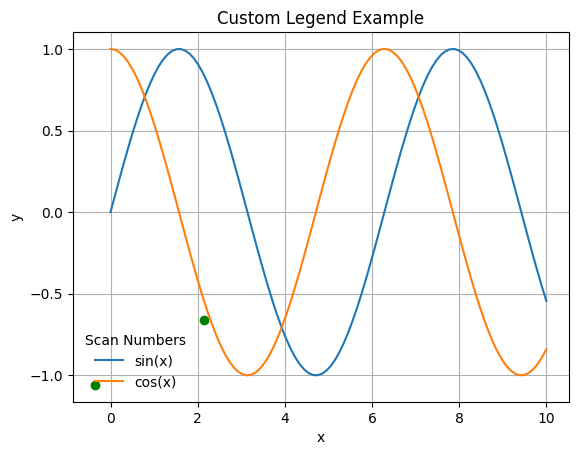

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 绘制图形
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')

# 自定义图例样式
# legend = plt.legend(loc='upper right', 
#            fontsize='large',         # 字体大小
#            edgecolor='blue',         # 边框颜色
#            framealpha=1,             # 边框透明度
#            shadow=True,              # 阴影效果
#            borderpad=1,              # 边框内边距
#            handlelength=2,           # 图例标记的长度
#            handleheight=2,           # 图例标记的高度
#            labelspacing=0.5)         # 标签间距
legend = plt.legend(loc='best', frameon=False, shadow=False, title='Scan Numbers', draggable=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Legend Example')
plt.grid(True)
# 触发渲染过程以初始化渲染器
plt.gcf().canvas.draw()
# 获取图例的像素坐标
legend_fig_coord = legend.get_window_extent().get_points()
# 转换坐标：像素到数据坐标系
ax = plt.gca()
inverse_transform = ax.transData.inverted()
data_coord = np.array([inverse_transform.transform(legend_fig_coord[0]), 
                       inverse_transform.transform(legend_fig_coord[1])])

print(data_coord)
# 绘制散点
for point in data_coord:
    plt.scatter(*point, marker='o', color='green')

plt.show()

边界框位置和大小: Bbox(x0=0.13585069444444445, y0=0.7695833333333333, x1=0.27979600694444445, y1=0.8655324074074073)
[0.13585069444444445, 0.7695833333333333, 0.1439453125, 0.09594907407407405]


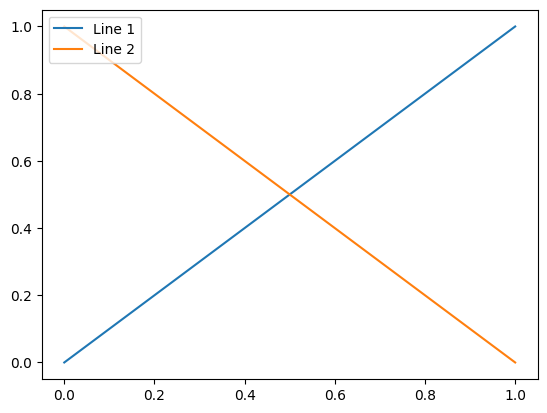

In [9]:
import matplotlib.pyplot as plt

# 创建一些数据和绘图
plt.plot([0, 1], [0, 1], label='Line 1')
plt.plot([1, 0], [0, 1], label='Line 2')

# 创建图例
legend = plt.legend(loc='upper left')

# 获取图例的位置
# 方法 2: 获取图例的边界框
bbox = legend.get_window_extent().transformed(plt.gcf().transFigure.inverted())
print("边界框位置和大小:", bbox)
print([bbox.x0, bbox.y0, bbox.width, bbox.height])
plt.show()

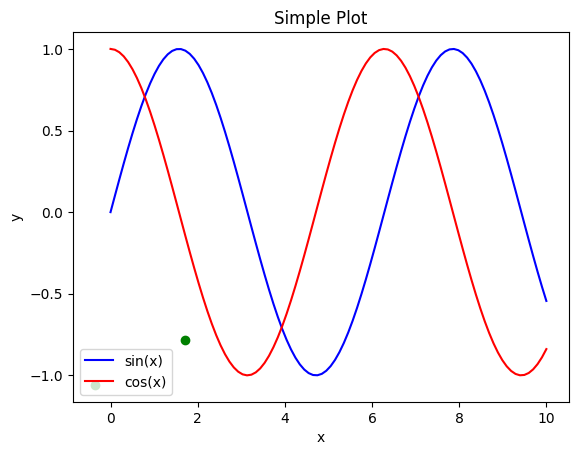

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 创建示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 绘制图表
plt.figure()
plt.plot(x, y1, '-b', label='sin(x)')
plt.plot(x, y2, '-r', label='cos(x)')
plt.title("Simple Plot")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend()

# 触发渲染过程以初始化渲染器
plt.gcf().canvas.draw()

# 获取图例的像素坐标
legend_fig_coord = legend.get_window_extent().get_points()

# 转换坐标：像素到数据坐标系
ax = plt.gca()
inverse_transform = ax.transData.inverted()
data_coord = np.array([inverse_transform.transform(legend_fig_coord[0]), 
                       inverse_transform.transform(legend_fig_coord[1])])

# 绘制散点
for point in data_coord:
    plt.scatter(*point, marker='o', color='green')

# 输出坐标
plt.show()

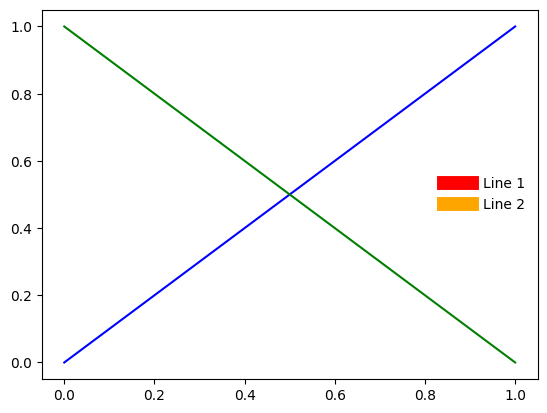

In [70]:
import matplotlib.pyplot as plt

# 创建一些数据和绘图
line1, = plt.plot([0, 1], [0, 1], label='Line 1', color='blue')
line2, = plt.plot([1, 0], [0, 1], label='Line 2', color='green')

# 创建图例
legend = plt.legend(loc='best', frameon=False, shadow=False)

# 从legend对象中获取句柄
handles = legend.legend_handles

# 修改句柄属性
# 设置线宽
for handle in handles:
    handle.set_linewidth(10)
# 定义颜色映射
color_map = matplotlib.colormaps.get_cmap('jet')
colors = [color_map(i / 10) for i in range(10)]
# 单独设置每个句柄的颜色
handles[0].set_color('red')   # 修改第一个句柄的颜色
handles[1].set_color('orange') # 修改第二个句柄的颜色

plt.show()

C:\Users\Carlo\AppData\Local\Temp\ipykernel_22596\481283400.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('jet')


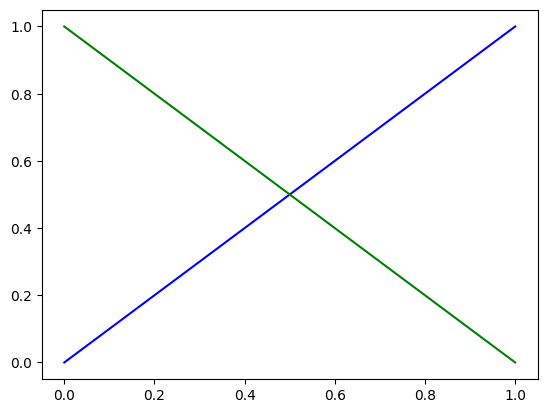

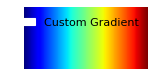

In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 创建一些数据和绘图
plt.plot([0, 1], [0, 1], color='blue')
plt.plot([1, 0], [0, 1], color='green')

# 定义颜色映射
color_map = plt.cm.get_cmap('jet')
colors = [color_map(i / 10) for i in range(10)]

# 创建一个表示颜色渐变的图例条
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(figsize=(2, 1), dpi=80)
ax.imshow(gradient, aspect='auto', cmap=color_map)
ax.set_axis_off()

# 创建一个自定义图例句柄
custom_handle = mpatches.Patch(color='white', label='Custom Gradient')

# 创建图例
plt.legend(handles=[custom_handle], loc='best', frameon=False, shadow=False)

plt.show()


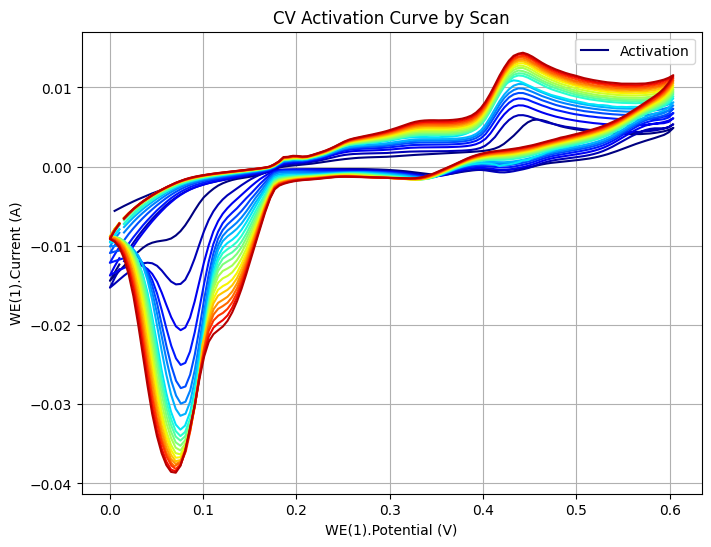

In [66]:
# 由于数据是循环的，我们可以使用颜色渐变来区分每个循环
# 首先，我们需要确定循环的数量
# data = pd.read_excel('./CV Activation.xlsx', header=0, index_col=None) # 加载数据

# 计算不同扫描（Scan）的数量
scans = data['Scan'].unique()

# 准备绘图
plt.figure(figsize=(8, 6))

# 定义颜色映射
color_map = matplotlib.colormaps.get_cmap('jet')
colors = [color_map(i / len(scans)) for i in range(len(scans))]

# 按扫描编号绘制每一圈的数据
for i, scan in enumerate(scans):
    scan_data = data[data['Scan'] == scan]
    plt.plot(scan_data['WE(1).Potential (V)'], scan_data['WE(1).Current (A)'],
             label=f'Scan {scan}',
             color=colors[i])

plt.xlabel('WE(1).Potential (V)')
plt.ylabel('WE(1).Current (A)')
plt.title('CV Activation Curve by Scan')
# plt.legend()
# 使用自定义的标签覆盖原始标签
custom_labels = ['Activation']
plt.legend(custom_labels)
plt.grid(True)
plt.show()

[[  8.96057348 558.36940837]
 [117.02508961 590.98124098]]


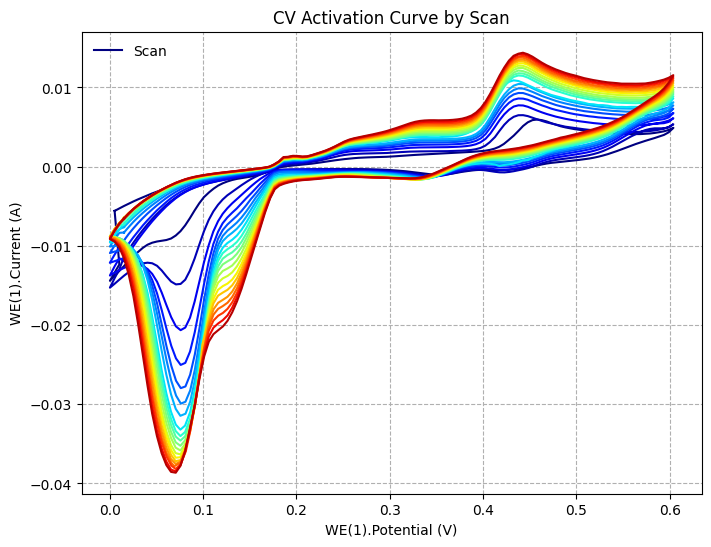

In [54]:
import matplotlib as mpl
data = pd.read_excel("G:/2-博士文件\9-实验数据/20230720-Autolab测试泡沫镍电极/MoAg2O4-1/CV Activation.xlsx", header=0, index_col=None) # 加载数据

# 计算不同扫描（Scan）的数量
scans = data['Scan'].unique()

# 准备绘图
fig, ax = plt.subplots(figsize=(8, 6))

# 定义颜色映射
color_map = matplotlib.colormaps.get_cmap('jet')
colors = [color_map(i / len(scans)) for i in range(len(scans))]

# 按扫描编号绘制每一圈的数据
for i, scan in enumerate(scans):
    scan_data = data[data['Scan'] == scan]
    potential = scan_data['WE(1).Potential (V)']
    current = scan_data['WE(1).Current (A)']

    # 将第一个元素复制并添加到列表末尾
    potential = pd.concat([potential, pd.Series([potential.iloc[0]])], ignore_index=True)
    current = pd.concat([current, pd.Series([current.iloc[0]])], ignore_index=True)

    if i == 0:
        ax.plot(potential, current, color=colors[i], label='Scan')
    else:
        ax.plot(potential, current, color=colors[i])

# 添加坐标轴标签和标题
ax.set_xlabel('WE(1).Potential (V)')
ax.set_ylabel('WE(1).Current (A)')
ax.set_title('CV Activation Curve by Scan')
ax.grid(True, linestyle='--')
legend = plt.legend(loc='upper left', frameon=False, shadow=False)
# 触发渲染过程以初始化渲染器
plt.gcf().canvas.draw()
# 获取图例的坐标（Axes坐标系）并转换为Figure坐标系
legend_fig_coord = legend.get_window_extent().transformed(ax.transAxes.inverted()).get_points()
fig_coord = fig.transFigure.transform(legend_fig_coord)
print(fig_coord)
# # 根据转换后的坐标调整颜色条的位置和大小
# cbar_left = fig_coord[0][0]
# cbar_bottom = fig_coord[0][1] - 0.05  # 根据需要调整
# cbar_width = fig_coord[1][0] - fig_coord[0][0]
# cbar_height = 0.02

# # 创建并放置颜色条
# norm = mpl.colors.Normalize(vmin=scans.min(), vmax=scans.max())
# sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
# sm.set_array([])
# cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
# cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Scan Number', fontsize=15)
# cbar.set_ticks([scans.min(), scans.max()])
# cbar.set_ticklabels([str(scans.min()), str(scans.max())])

# 显示图形
plt.show()

[[106.94444444 495.94444444]
 [190.69444444 521.05555556]]
转换后的坐标： 0.13368055555555555 0.8265740740740741
边界框位置和大小: [[-0.02266224  0.01298125]
 [ 0.06706778  0.01615112]]


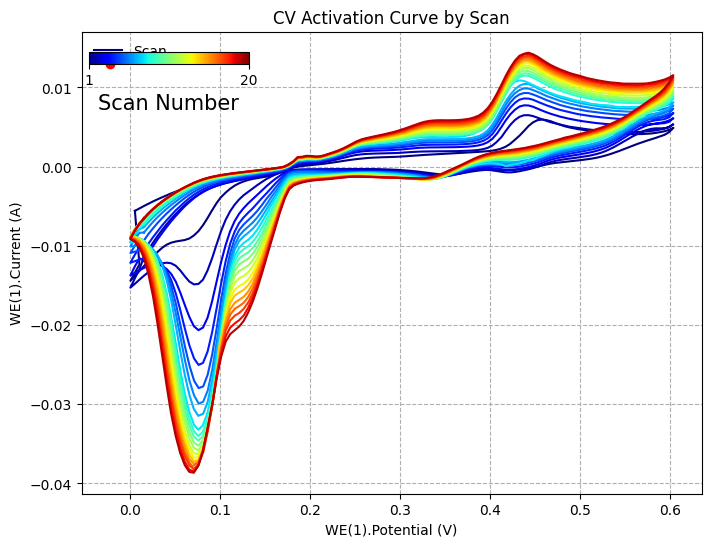

图的宽度（像素）: 800.0
图的高度（像素）: 600.0


In [69]:
import matplotlib as mpl
data = pd.read_excel("G:/2-博士文件\9-实验数据/20230720-Autolab测试泡沫镍电极/MoAg2O4-1/CV Activation.xlsx", header=0, index_col=None) # 加载数据

# 计算不同扫描（Scan）的数量
scans = data['Scan'].unique()

# 准备绘图
fig, ax = plt.subplots(figsize=(8, 6))

# 定义颜色映射
color_map = matplotlib.colormaps.get_cmap('jet')
colors = [color_map(i / len(scans)) for i in range(len(scans))]

# 按扫描编号绘制每一圈的数据
for i, scan in enumerate(scans):
    scan_data = data[data['Scan'] == scan]
    potential = scan_data['WE(1).Potential (V)']
    current = scan_data['WE(1).Current (A)']

    # 将第一个元素复制并添加到列表末尾
    potential = pd.concat([potential, pd.Series([potential.iloc[0]])], ignore_index=True)
    current = pd.concat([current, pd.Series([current.iloc[0]])], ignore_index=True)

    if i == 0:
        ax.plot(potential, current, color=colors[i], label='Scan')
    else:
        ax.plot(potential, current, color=colors[i])

# 添加坐标轴标签和标题
ax.set_xlabel('WE(1).Potential (V)')
ax.set_ylabel('WE(1).Current (A)')
ax.set_title('CV Activation Curve by Scan')
ax.grid(True, linestyle='--')
legend = plt.legend(loc='upper left', frameon=False, shadow=False)
# 触发渲染过程以初始化渲染器
plt.gcf().canvas.draw()
# 获取图例的像素坐标
legend_fig_coord = legend.get_window_extent().get_points()
print(legend_fig_coord)
# 转换坐标：像素到数据坐标系
ax = plt.gca()
inverse_transform = ax.transData.inverted()
data_coord = np.array([inverse_transform.transform(legend_fig_coord[0]), 
                       inverse_transform.transform(legend_fig_coord[1])])
# 创建颜色条
norm = mpl.colors.Normalize(vmin=scans.min(), vmax=scans.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
# 创建专门用于颜色条的Axes对象，并指定位置和大小
# cbar_ax = fig.add_axes([0.15, 0.8, 0.2, 0.02])  # [左, 下, 宽度, 高度]
cbar_ax = fig.add_axes([legend_fig_coord[0][0]/800, legend_fig_coord[0][1]/600, 0.2, 0.02])  # [左, 下, 宽度, 高度]
print("转换后的坐标：",legend_fig_coord[0][0]/800, legend_fig_coord[0][1]/600)
ax.scatter(data_coord[0][0], data_coord[0][1], color='red', marker='o')
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Scan Number', fontsize=15)
cbar.set_ticks([scans.min(), scans.max()])  # 设置颜色条上的刻度为最小和最大扫描数
cbar.set_ticklabels([str(scans.min()), str(scans.max())])  # 设置对应的标签
# ax.scatter(data_coord[0][0], data_coord[0][1], color='red', marker='o')
print("边界框位置和大小:", data_coord)
plt.show()

# 获取图形的尺寸（英寸）
size_inches = fig.get_size_inches()

# 获取图形的DPI
dpi = fig.dpi

# 计算图形的尺寸（像素）
width_pixels = size_inches[0] * dpi
height_pixels = size_inches[1] * dpi

print("图的宽度（像素）:", width_pixels)
print("图的高度（像素）:", height_pixels)

In [15]:
color_map = matplotlib.colormaps.get_cmap('viridis')
colors = [color_map(i / len(scans)) for i in range(len(scans))]
colors

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.280267, 0.073417, 0.397163, 1.0),
 (0.282623, 0.140926, 0.457517, 1.0),
 (0.273006, 0.20452, 0.501721, 1.0),
 (0.253935, 0.265254, 0.529983, 1.0),
 (0.229739, 0.322361, 0.545706, 1.0),
 (0.206756, 0.371758, 0.553117, 1.0),
 (0.183898, 0.422383, 0.556944, 1.0),
 (0.163625, 0.471133, 0.558148, 1.0),
 (0.144759, 0.519093, 0.556572, 1.0),
 (0.127568, 0.566949, 0.550556, 1.0),
 (0.119423, 0.611141, 0.538982, 1.0),
 (0.134692, 0.658636, 0.517649, 1.0),
 (0.185783, 0.704891, 0.485273, 1.0),
 (0.266941, 0.748751, 0.440573, 1.0),
 (0.369214, 0.788888, 0.382914, 1.0),
 (0.477504, 0.821444, 0.318195, 1.0),
 (0.606045, 0.850733, 0.236712, 1.0),
 (0.741388, 0.873449, 0.149561, 1.0),
 (0.876168, 0.891125, 0.09525, 1.0)]

In [12]:
matplotlib.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [10]:
help(matplotlib.colormaps.get_cmap)

Help on method get_cmap in module matplotlib.cm:

get_cmap(cmap) method of matplotlib.cm.ColormapRegistry instance
    Return a color map specified through *cmap*.
    
    Parameters
    ----------
    cmap : str or `~matplotlib.colors.Colormap` or None
    
        - if a `.Colormap`, return it
        - if a string, look it up in ``mpl.colormaps``
        - if None, return the Colormap defined in :rc:`image.cmap`
    
    Returns
    -------
    Colormap



In [30]:
from matplotlib import cm
from matplotlib import colormaps as cm
color_map = cm.get_cmap('viridis', len(scans))

C:\Users\Carlo\AppData\Local\Temp\ipykernel_19104\4171736326.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(scans))


In [32]:
import os

# 假设这是您的文件路径
file_path = "C:/Users/Carlo/Desktop/电化学后处理/data.xlsx"

# 使用 os.path.basename 来获取文件名
file_name = os.path.basename(file_path)

print(file_name)


data.xlsx


In [33]:
import os

# 假设这是您的文件路径
file_path = "C:/Users/Carlo/Desktop/电化学后处理/data.xlsx"

# 获取最后一个部分（文件名或最末级文件夹名）
last_part = os.path.basename(file_path)

# 获取倒数第二个部分（上级目录名）
second_last_part = os.path.basename(os.path.dirname(file_path))

print("最后一个部分:", last_part)
print("倒数第二个部分:", second_last_part)


最后一个部分: data.xlsx
倒数第二个部分: 电化学后处理


In [34]:
data = pd.read_excel('./Cdl-40.xlsx', header=0, index_col=None)
data.head()

,Scan,Index,Time (s),WE(1).Potential (V),WE(1).Current (A),Current range
0,1,1,5.850165,0.423035,0.007669,1 mA
1,1,2,5.911165,0.425568,0.007415,1 mA
2,1,3,5.972165,0.428101,0.007304,1 mA
3,1,4,6.033165,0.430634,0.007226,1 mA
4,1,5,6.094165,0.433167,0.007153,1 mA


In [36]:
data['Scan'].max()-1

31

In [37]:
# 筛选出最后一次扫描的数据
last_scan_number = data['Scan'].max() - 1
last_scan_data = data[data['Scan'] == last_scan_number].copy()
last_scan_data

,Scan,Index,Time (s),WE(1).Potential (V),WE(1).Current (A),Current range
2443,31,2444,154.873165,0.422821,-0.000180,NaN
2444,31,2445,154.934165,0.425354,-0.000068,NaN
2445,31,2446,154.995165,0.427887,0.000021,NaN
2446,31,2447,155.056165,0.430420,0.000090,NaN
2447,31,2448,155.117165,0.432983,0.000147,NaN
...,...,...,...,...,...,...
2518,31,2519,159.448165,0.429840,-0.000802,NaN
2519,31,2520,159.509165,0.427490,-0.000816,NaN
2520,31,2521,159.570165,0.425171,-0.000826,NaN
2521,31,2522,159.631165,0.422821,-0.000847,NaN
